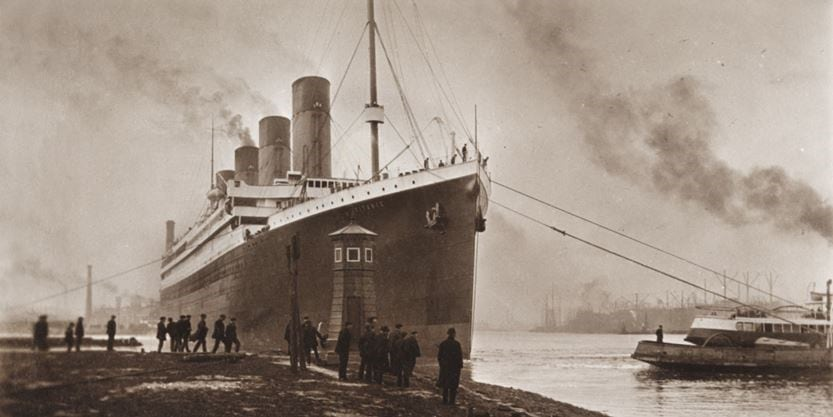

# PROBLEM STATEMENT
The sinking of the Titanic on April 15th, 1912 is one of the most tragic tragedies in history. The Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers. The numbers of survivors were low due to the lack of lifeboats for all passengers and crew. Some passengers were more likely to survive than others, such as women, children, and upper-class. This case study analyzes what sorts of people were likely to survive this tragedy. The dataset includes the following:

.Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)

.Sex: Male or Female

.Age: Age in years

.Sibsp: # of siblings / spouses aboard the Titanic

.Parch: # of parents / children aboard the Titanic

.Ticket: Ticket number

.Fare: Passenger fare

.Cabin: Cabin number

.Embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

.Target class: Survived: Survival (0 = No, 1 = Yes)

 # STEP #0 : LIBRARIES IMPORT

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# STEP #1 : IMPORT THE DATASET

In [2]:
# read the dataset using pandas dataframe
Dataset = pd.read_csv('Train_Titanic.csv')

# STEP #2 : EXPLORE/VISUALIZE THE DATASET

In [3]:
# Let's count the number of survivors and non-survivors
survived = Dataset [ Dataset ['Survived']==1]
not_survived = Dataset [Dataset ['Survived']==0]

In [4]:
# Count the survived and deceased 
print('Total = ', len(Dataset))
print('number of passengers who survived', len(survived))
print('number of passengers who did not survive', len(not_survived))
print('% Survived', 1.* len(survived)/len(Dataset) *100)
print('% Did not Survive', 1.* len(not_survived)/len(Dataset) *100)

('Total = ', 891)
('number of passengers who survived', 342)
('number of passengers who did not survive', 549)
('% Survived', 38.38383838383838)
('% Did not Survive', 61.61616161616161)


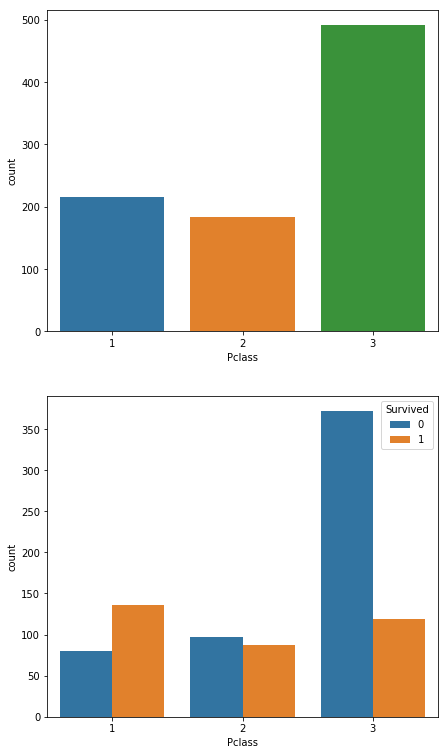

In [5]:
# Bar Chart to indicate the number of people survived based on their class
# If you are a first class, you have a higher chance of survival
plt.figure(figsize = [7, 13])
plt.subplot(211)
sns.countplot(x ='Pclass', data = Dataset)
plt.subplot(212)
sns.countplot(x ='Pclass', hue = 'Survived', data = Dataset)

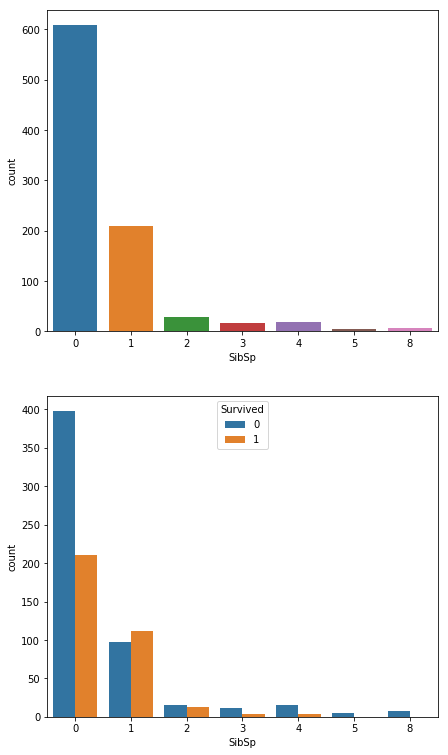

In [6]:
# Bar Chart to indicate the number of people survived based on their siblings status
# If you have 1 siblings (SibSp = 1), you have a higher chance of survival compared to being alone (SibSp = 0)
plt.figure(figsize = [7, 13])
plt.subplot(211)
sns.countplot(x ='SibSp', data = Dataset)
plt.subplot(212)
sns.countplot(x ='SibSp', hue = 'Survived', data = Dataset)



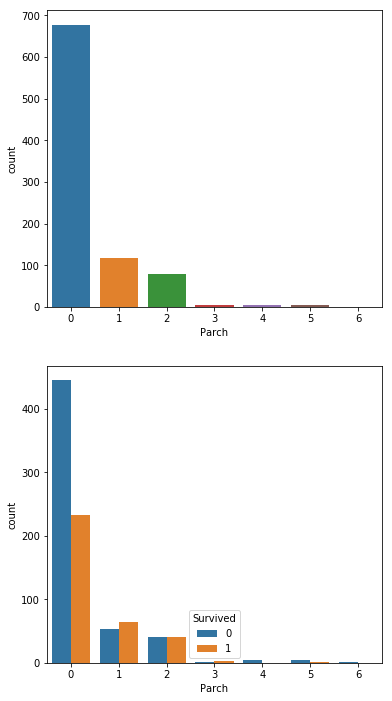

In [7]:
# Bar Chart to indicate the number of people survived based on their Parch status (how many parents onboard)
# If you have 1, 2, or 3 family members (Parch = 1,2), you have a higher chance of survival compared to being alone (Parch = 0)
plt.figure(figsize = [6, 12])
plt.subplot(211)
sns.countplot(x ='Parch', data = Dataset)
plt.subplot(212)
sns.countplot(x ='Parch', hue = 'Survived', data = Dataset)

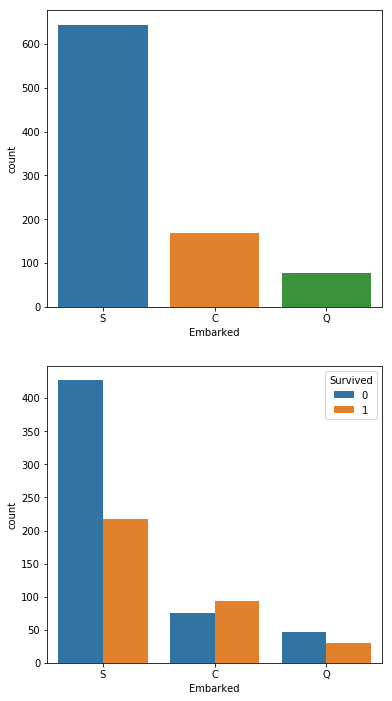

In [8]:
# Bar Chart to indicate the number of people survived based on the port they embarked from
# Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
# If you embarked from port "C", you have a higher chance of survival compared to other ports!
plt.figure(figsize = [6, 12])
plt.subplot(211)
sns.countplot(x ='Embarked', data = Dataset)
plt.subplot(212)
sns.countplot(x ='Embarked', hue = 'Survived', data = Dataset)

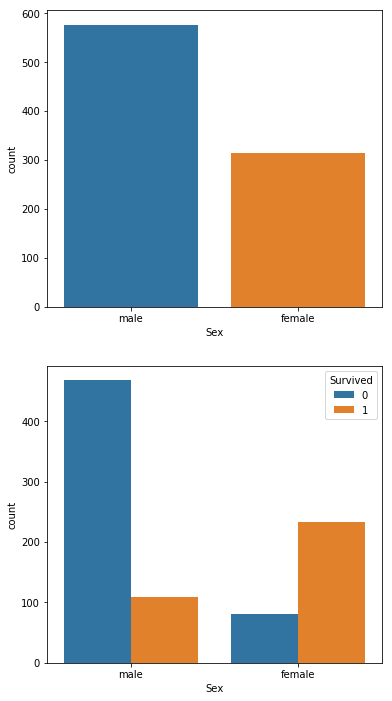

In [9]:
# Bar Chart to indicate the number of people survived based on their sex
# If you are a female, you have a higher chance of survival compared to other ports!
plt.figure(figsize = [6, 12])
plt.subplot(211)
sns.countplot(x ='Sex', data = Dataset)
plt.subplot(212)
sns.countplot(x ='Sex', hue = 'Survived', data = Dataset)

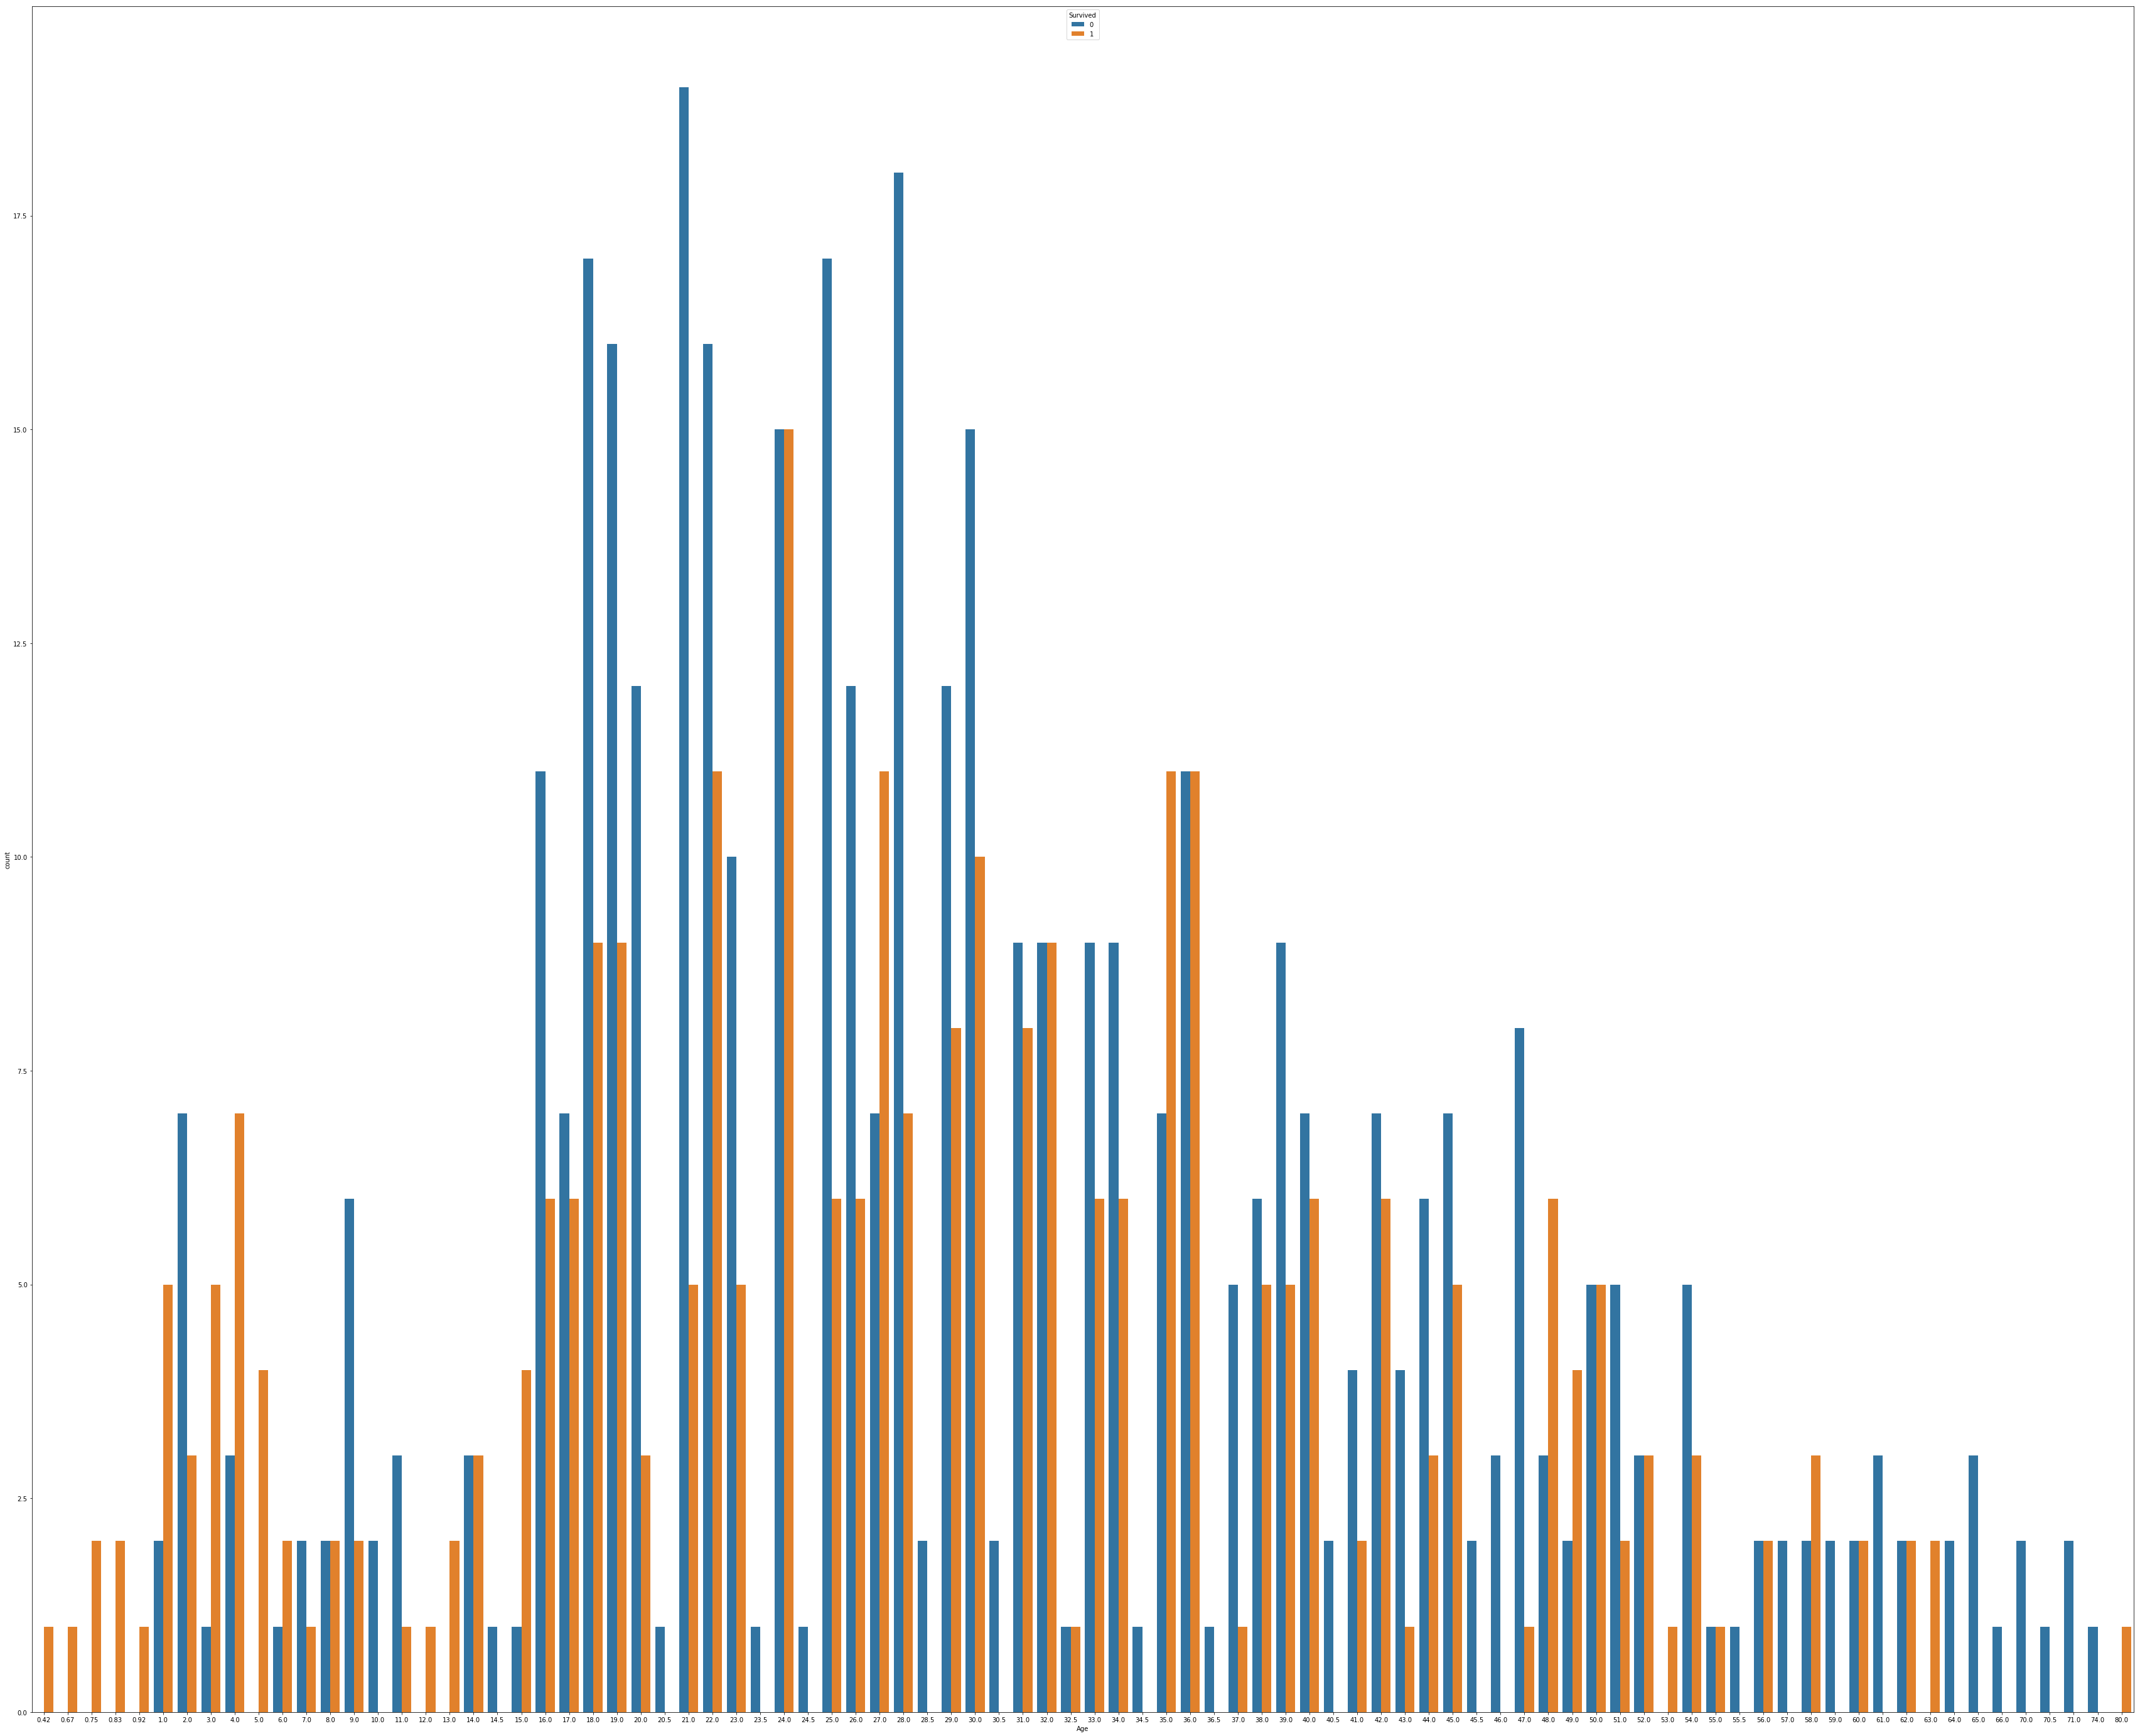

In [10]:
# Bar Chart to indicate the number of people survived based on their age
# If you are a baby, you have a higher chance of survival!
plt.figure(figsize = [60,50])
sns.countplot(x = 'Age', hue = 'Survived', data = Dataset)

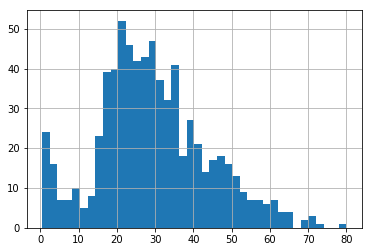

In [11]:
# Age Histogram 
Dataset['Age'].hist(bins = 40)

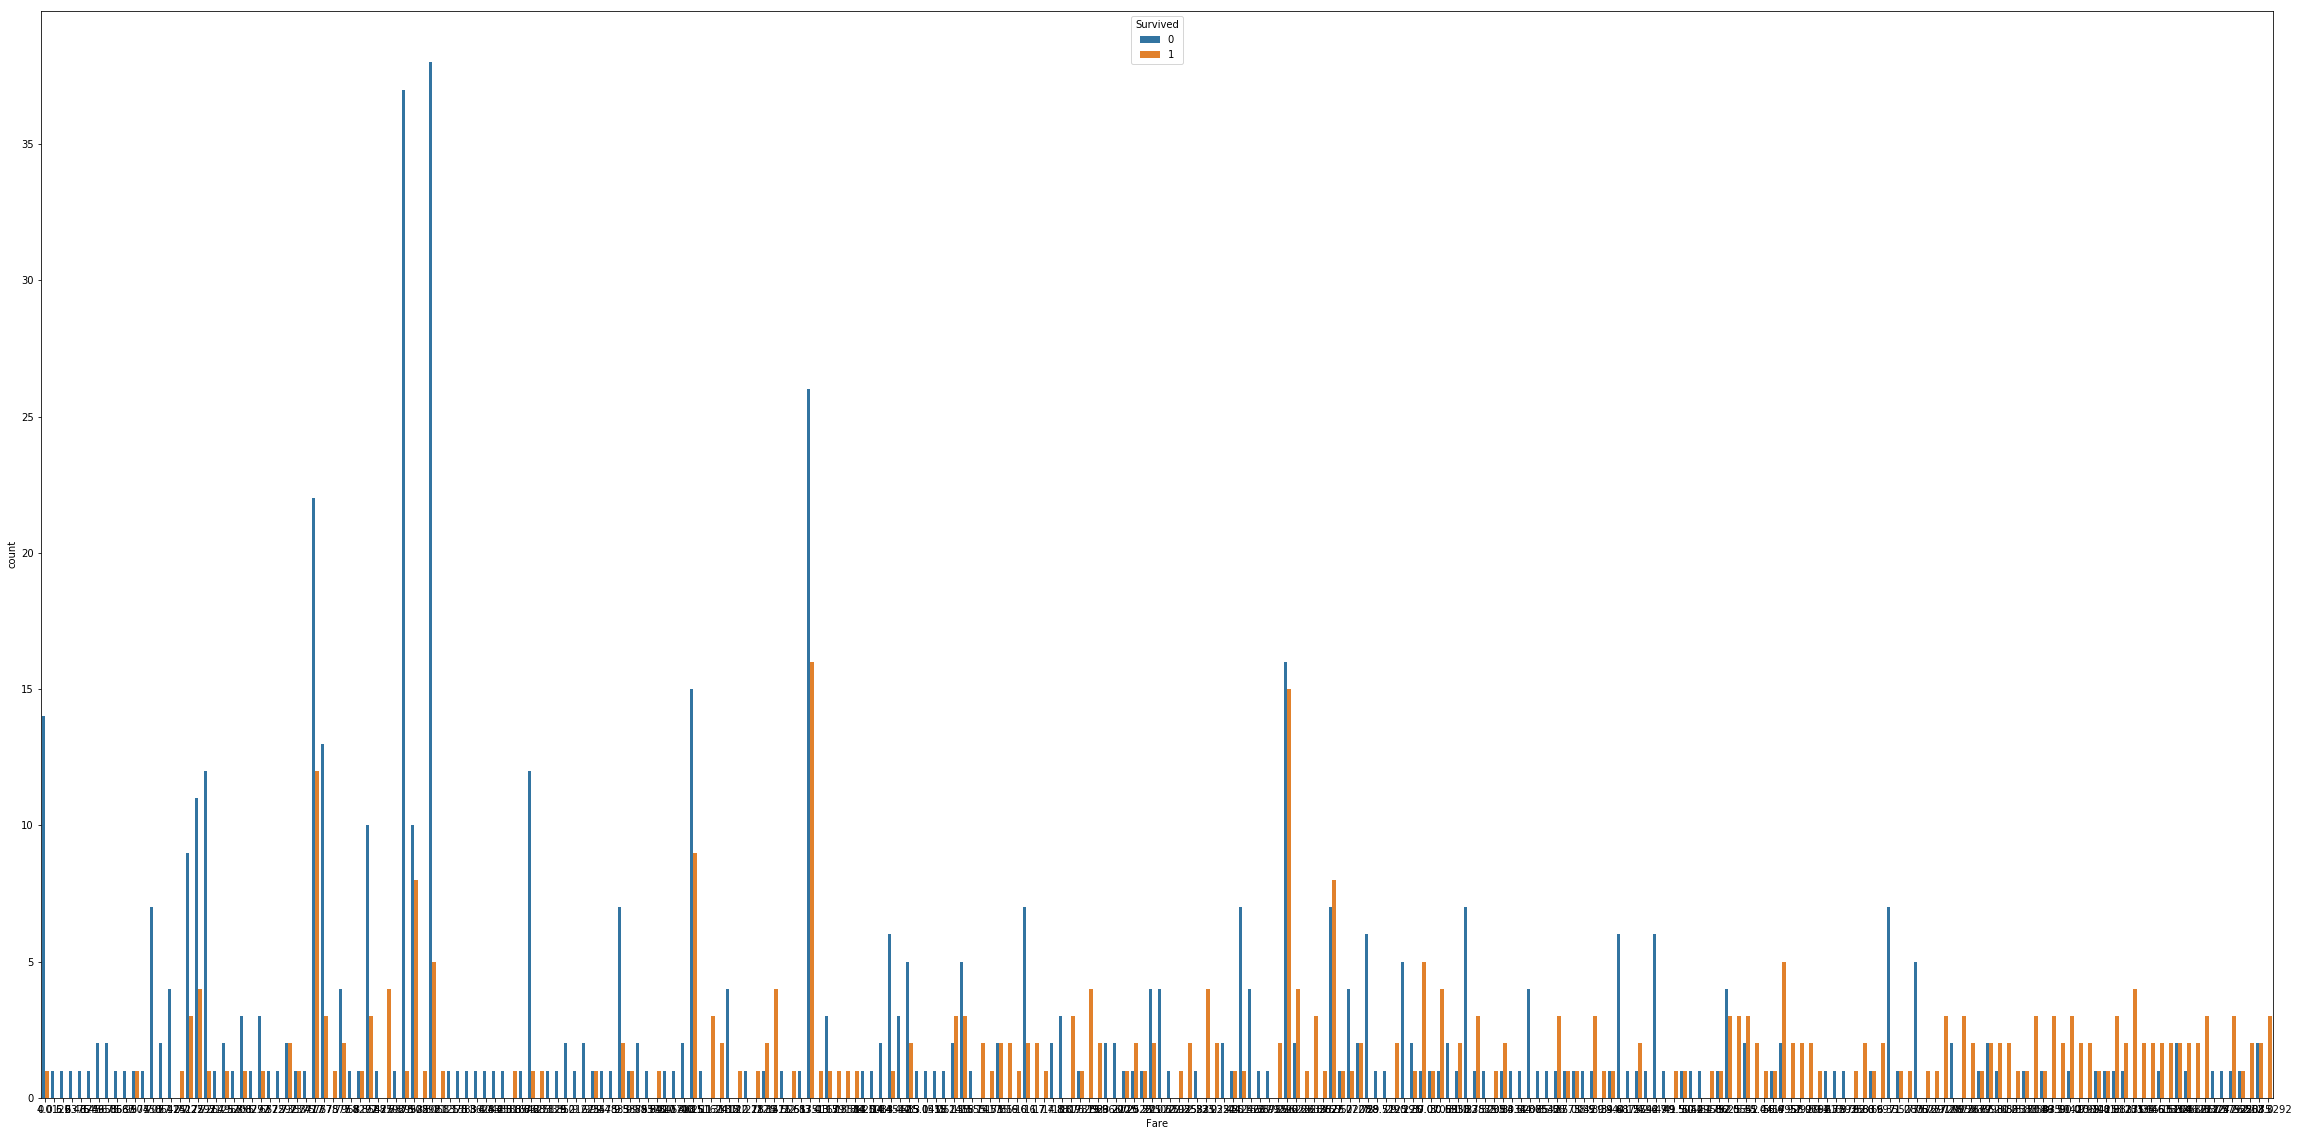

In [12]:
# Bar Chart to indicate the number of people survived based on their fare
# If you pay a higher fare, you have a higher chance of survival
plt.figure(figsize = [40,20])
sns.countplot(x = 'Fare', hue = 'Survived', data = Dataset)

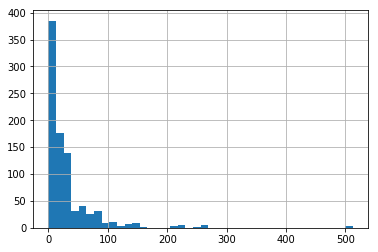

In [13]:
#Fare Histogram
Dataset['Fare'].hist(bins = 40)

# STEP#3 : PREPARE THE DATA FOR TRAINING/DATA CLEANING

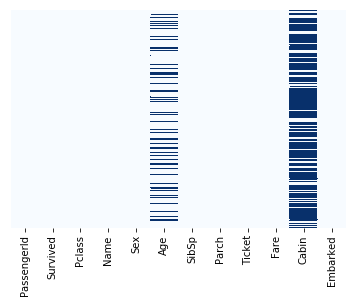

In [14]:
# Let's explore which dataset is missing
sns.heatmap(Dataset.isnull(), yticklabels = False, cbar = False , cmap = 'Blues')

In [15]:
# Let's drop the 'Name', 'Ticket', 'Embarked', 'Cabin','PassengerId' coloumns
Dataset.drop(['Name', 'Ticket', 'Embarked', 'Cabin','PassengerId'], axis = 1, inplace = True)

In [16]:
Dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
5,0,3,male,NaN,0,0,8.4583
6,0,1,male,54.0,0,0,51.8625
7,0,3,male,2.0,3,1,21.0750
8,1,3,female,27.0,0,2,11.1333
9,1,2,female,14.0,1,0,30.0708


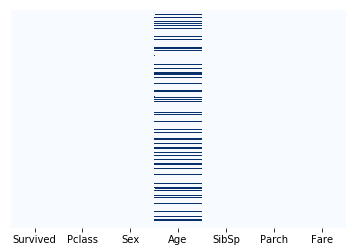

In [17]:
# Let's view the data one more time!
sns.heatmap(Dataset.isnull(), yticklabels = False , cbar = False , cmap = 'Blues')

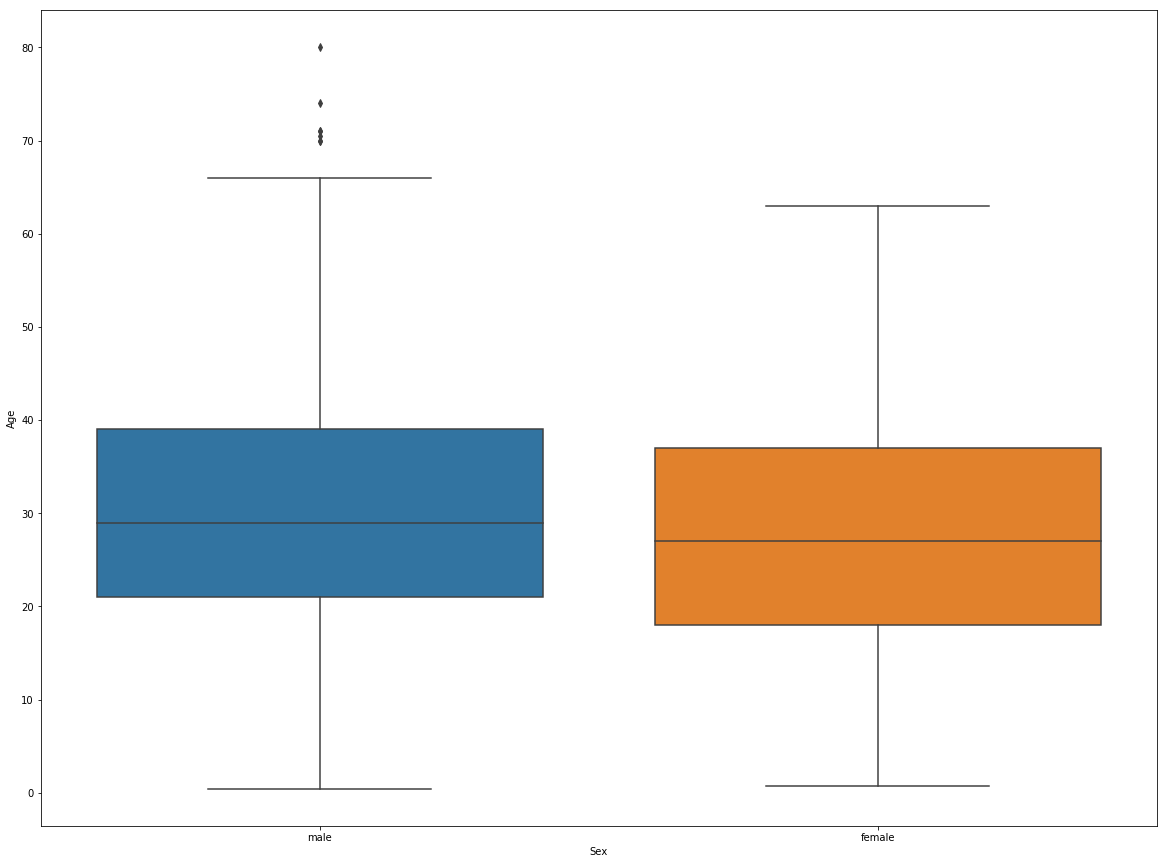

In [18]:
# Let's get the average age for male (~29) and female (~25)
plt.figure(figsize = (20 , 15))  
sns.boxplot(x = 'Sex', y = 'Age', data = Dataset)


In [19]:
# Function to return our missing data 'NaN'
def Fill_Age(data) :
    sex = data[0]
    age = data[1]
    
    if pd.isnull(age) :
      if sex is 'male' :
            return 29
      else :
        return 25
    else :
        return age

In [20]:
# Let's apply our function on our missing data 'NaN'
Dataset['Age'] = Dataset[['Sex', 'Age'] ].apply(Fill_Age , axis = 1)

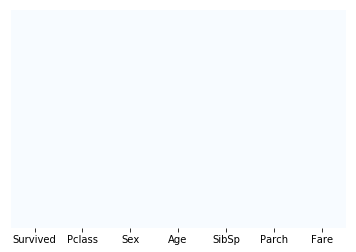

In [21]:
# Let's view the data one more time!
sns.heatmap(Dataset.isnull(), yticklabels = False , cbar = False , cmap = 'Blues')

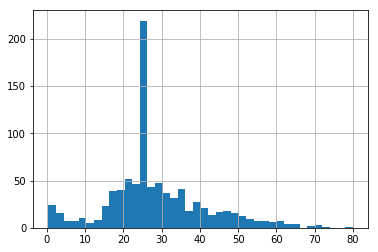

In [22]:
# Age histogram after filling the missing data
Dataset['Age'].hist(bins = 40)

In [23]:
Dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
5,0,3,male,25.0,0,0,8.4583
6,0,1,male,54.0,0,0,51.8625
7,0,3,male,2.0,3,1,21.0750
8,1,3,female,27.0,0,2,11.1333
9,1,2,female,14.0,1,0,30.0708


In [24]:
# Encoding The Categorical Data (Sex)
# Avoiding Dummy Variable Trap
male = pd.get_dummies(Dataset['Sex'], drop_first = True)

In [25]:
# Let's drop the sex column
Dataset.drop(['Sex'], axis = 1, inplace = True)

In [26]:
Dataset

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
5,0,3,25.0,0,0,8.4583
6,0,1,54.0,0,0,51.8625
7,0,3,2.0,3,1,21.0750
8,1,3,27.0,0,2,11.1333
9,1,2,14.0,1,0,30.0708


In [27]:
# Now let's add the encoded column male again
Dataset = pd.concat([Dataset , male], axis = 1)

In [28]:
Dataset

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
5,0,3,25.0,0,0,8.4583,1
6,0,1,54.0,0,0,51.8625,1
7,0,3,2.0,3,1,21.0750,1
8,1,3,27.0,0,2,11.1333,0
9,1,2,14.0,1,0,30.0708,0


In [29]:
#Let's drop the target coloumn 'Survived' before we do train test split
X = Dataset.drop('Survived', axis = 1).values
y = Dataset['Survived'].values

# STEP #4 : MODEL TRAINING

In [85]:
# Let's import our model for train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [86]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# STEP #5 : MODEL TESTING

In [87]:
# Predicting the Test set results
y_predict = classifier.predict(X_test)
y_predict

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0])

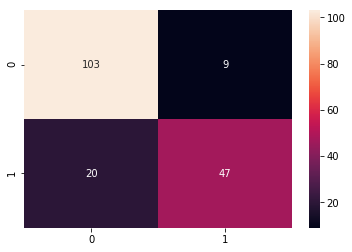

In [88]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot= True, fmt = 'd')

In [89]:
# Displaying our model results
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       112
           1       0.84      0.70      0.76        67

   micro avg       0.84      0.84      0.84       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.84      0.83       179

